# Sign Classification MNIST

## 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'function assignment.ipynb',
 'mnist_sign.h5',
 'sign-mnist 99.6% accuracy.ipynb',
 'sign_mnist_test',
 'sign_mnist_train']

## 2. Read and preprocess data

In [3]:
data = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
array = np.array(data.iloc[ : , 1:])
array = array/255.0

In [5]:
labels = np.array(data.iloc[:, 0])

### Display examples from data

In [6]:
def show_next_9_plots (pos):
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.title(labels[i])
        plt.imshow(array[i].reshape((28,28)), "gray")
        plt.axis('off')

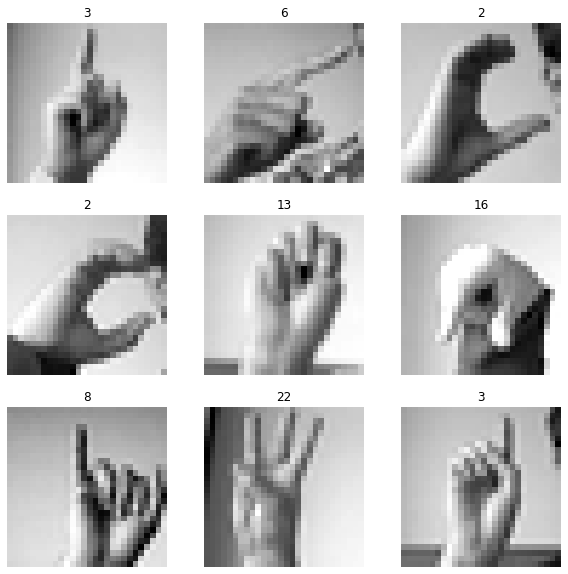

In [7]:
show_next_9_plots(10)

In [8]:
## reshape array to image of 28x28,1
array = array.reshape(27455,28,28,1)

## one hot encode labels
labels = keras.utils.to_categorical(labels)

In [9]:
## image augmentation using keras to decrease overfitting 

from keras.preprocessing.image import ImageDataGenerator
datagen  = ImageDataGenerator(rotation_range=10,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             zoom_range = 0.1)
datagen.fit(array)

In [10]:
## test data

test_data = pd.read_csv('sign_mnist_test\sign_mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [11]:
## preporcess test data

array_test = np.array(test_data.iloc[ : , 1:])/255.0
labels_test = np.array(test_data.iloc[:, 0])
array_test = array_test.reshape(7172,28,28,1)
labels_test = keras.utils.to_categorical(labels_test)
print(labels_test.shape, array_test.shape)

(7172, 25) (7172, 28, 28, 1)


## 3. Build CNN Model

In [12]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation="relu", padding="same"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation="relu", padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu", padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dense(25, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 48)        27696     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          13856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [13]:
## compile model
model.compile(optimizer="adam", metrics=["accuracy"], loss="categorical_crossentropy")

In [14]:
## train model with 20 epochs
history= model.fit(datagen.flow(array, labels, batch_size=128), epochs=20, validation_data=(array_test, labels_test), verbose=1)

Epoch 1/20
215/215 [==============================] - 77s 356ms/step - loss: 2.2834 - accuracy: 0.2923 - val_loss: 0.9088 - val_accuracy: 0.6948
Epoch 2/20
215/215 [==============================] - 74s 343ms/step - loss: 0.8561 - accuracy: 0.7097 - val_loss: 0.3633 - val_accuracy: 0.8883
Epoch 3/20
215/215 [==============================] - 73s 339ms/step - loss: 0.4671 - accuracy: 0.8399 - val_loss: 0.1729 - val_accuracy: 0.9538
Epoch 4/20
215/215 [==============================] - 75s 350ms/step - loss: 0.2959 - accuracy: 0.8982 - val_loss: 0.1378 - val_accuracy: 0.9572
Epoch 5/20
215/215 [==============================] - 75s 350ms/step - loss: 0.2147 - accuracy: 0.9264 - val_loss: 0.0668 - val_accuracy: 0.9828
Epoch 6/20
215/215 [==============================] - 76s 355ms/step - loss: 0.1603 - accuracy: 0.9453 - val_loss: 0.0644 - val_accuracy: 0.9780
Epoch 7/20
215/215 [==============================] - 74s 343ms/step - loss: 0.1247 - accuracy: 0.9580 - val_loss: 0.0432 - val_ac

In [15]:
score = model.evaluate(array_test, labels_test, batch_size=128)
print(score)

7172/7172 [==============================] - 10s 1ms/step
[0.012633397478176042, 0.995677649974823]


In [16]:
## save model
model.save("mnist_sign.h5")

In [17]:
from keras.models import load_model
model= load_model("mnist_sign.h5")

## 4. Analyse Training phase

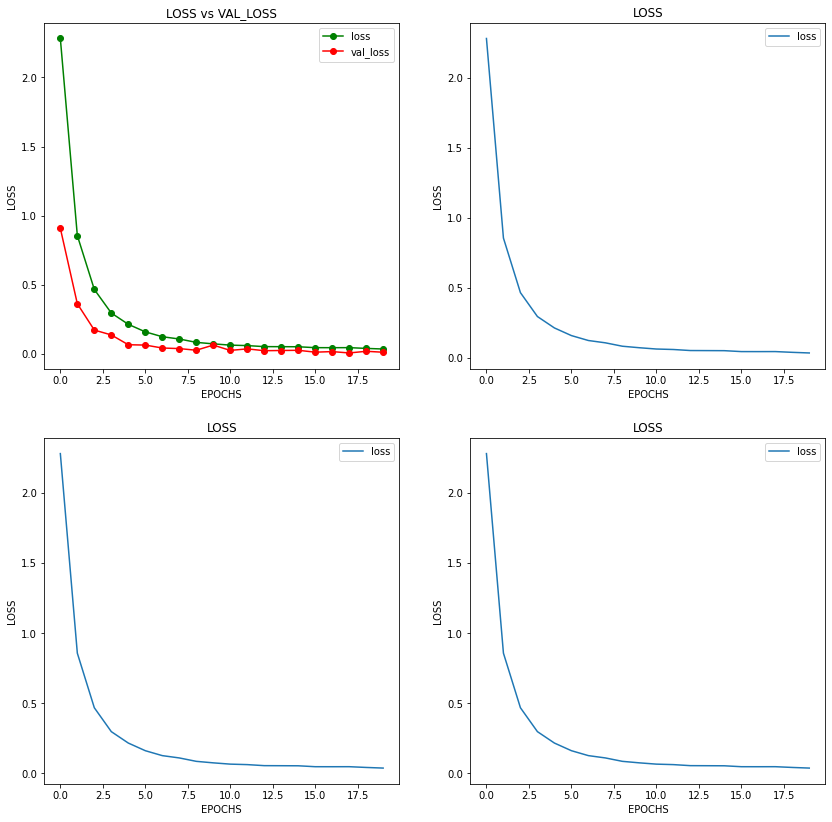

In [18]:
loss = history.history["loss"]
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = [i for i in range(20)]

fig = plt.figure(figsize= (14,14))

plt.subplot(2,2,1)
plt.plot(epochs, loss, "go-")
plt.plot(epochs, val_loss, "ro-")
plt.title("LOSS vs VAL_LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['loss', "val_loss"])

plt.subplot(2,2,2)
plt.plot(epochs, loss)
plt.title("LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['loss'])

plt.subplot(2,2,3)
plt.plot(epochs, loss)
plt.title("LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['loss'])

plt.subplot(2,2,4)
plt.plot(epochs, loss)
plt.title("LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['loss'])